<a href="https://colab.research.google.com/github/OswaldVc/Arduino/blob/main/MC/Factores_del_comportamiento_humano_en_la_Conducci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

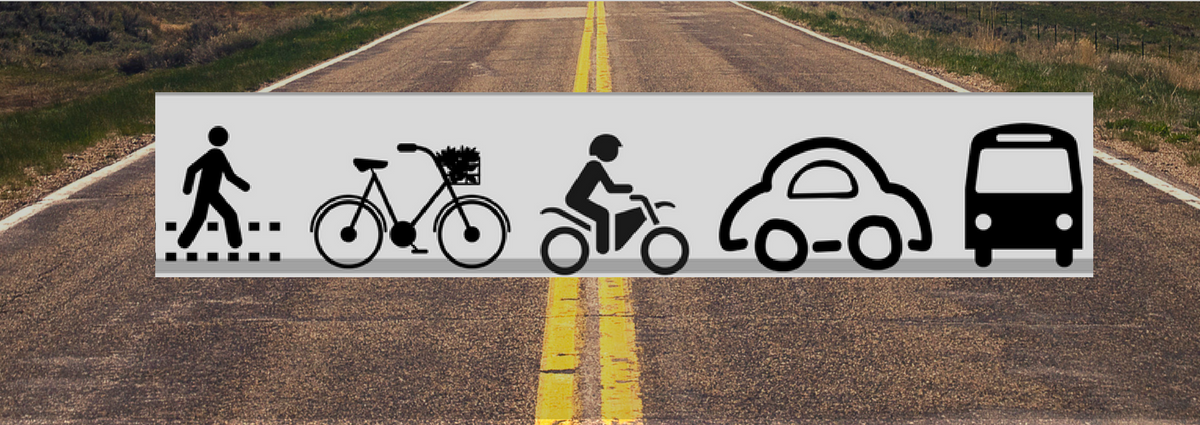

***Autores:***

- Socióloga Diana C. Garavito A.
- Ingeniero Néstor O. Vásquez C.


***¿Qué factores están impulsando la accidentalidad vial en la compañia Masivo Capital?***

In [3]:
# ------- Importación de Módulos ------------

import matplotlib.pyplot as plt
from datetime import datetime
from locale import normalize
from datetime import date
import missingno as msno

import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.express    as px
import warnings
import seaborn
import pandas as pd
import numpy  as np

sns.set_style("darkgrid")
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

url_base ="https://github.com/OswaldVc/Datos/blob/main/Factor_social.xlsx"
df = pd.read_excel(url_base)

HTTPError: ignored

# ***Lectura de DataFrame***

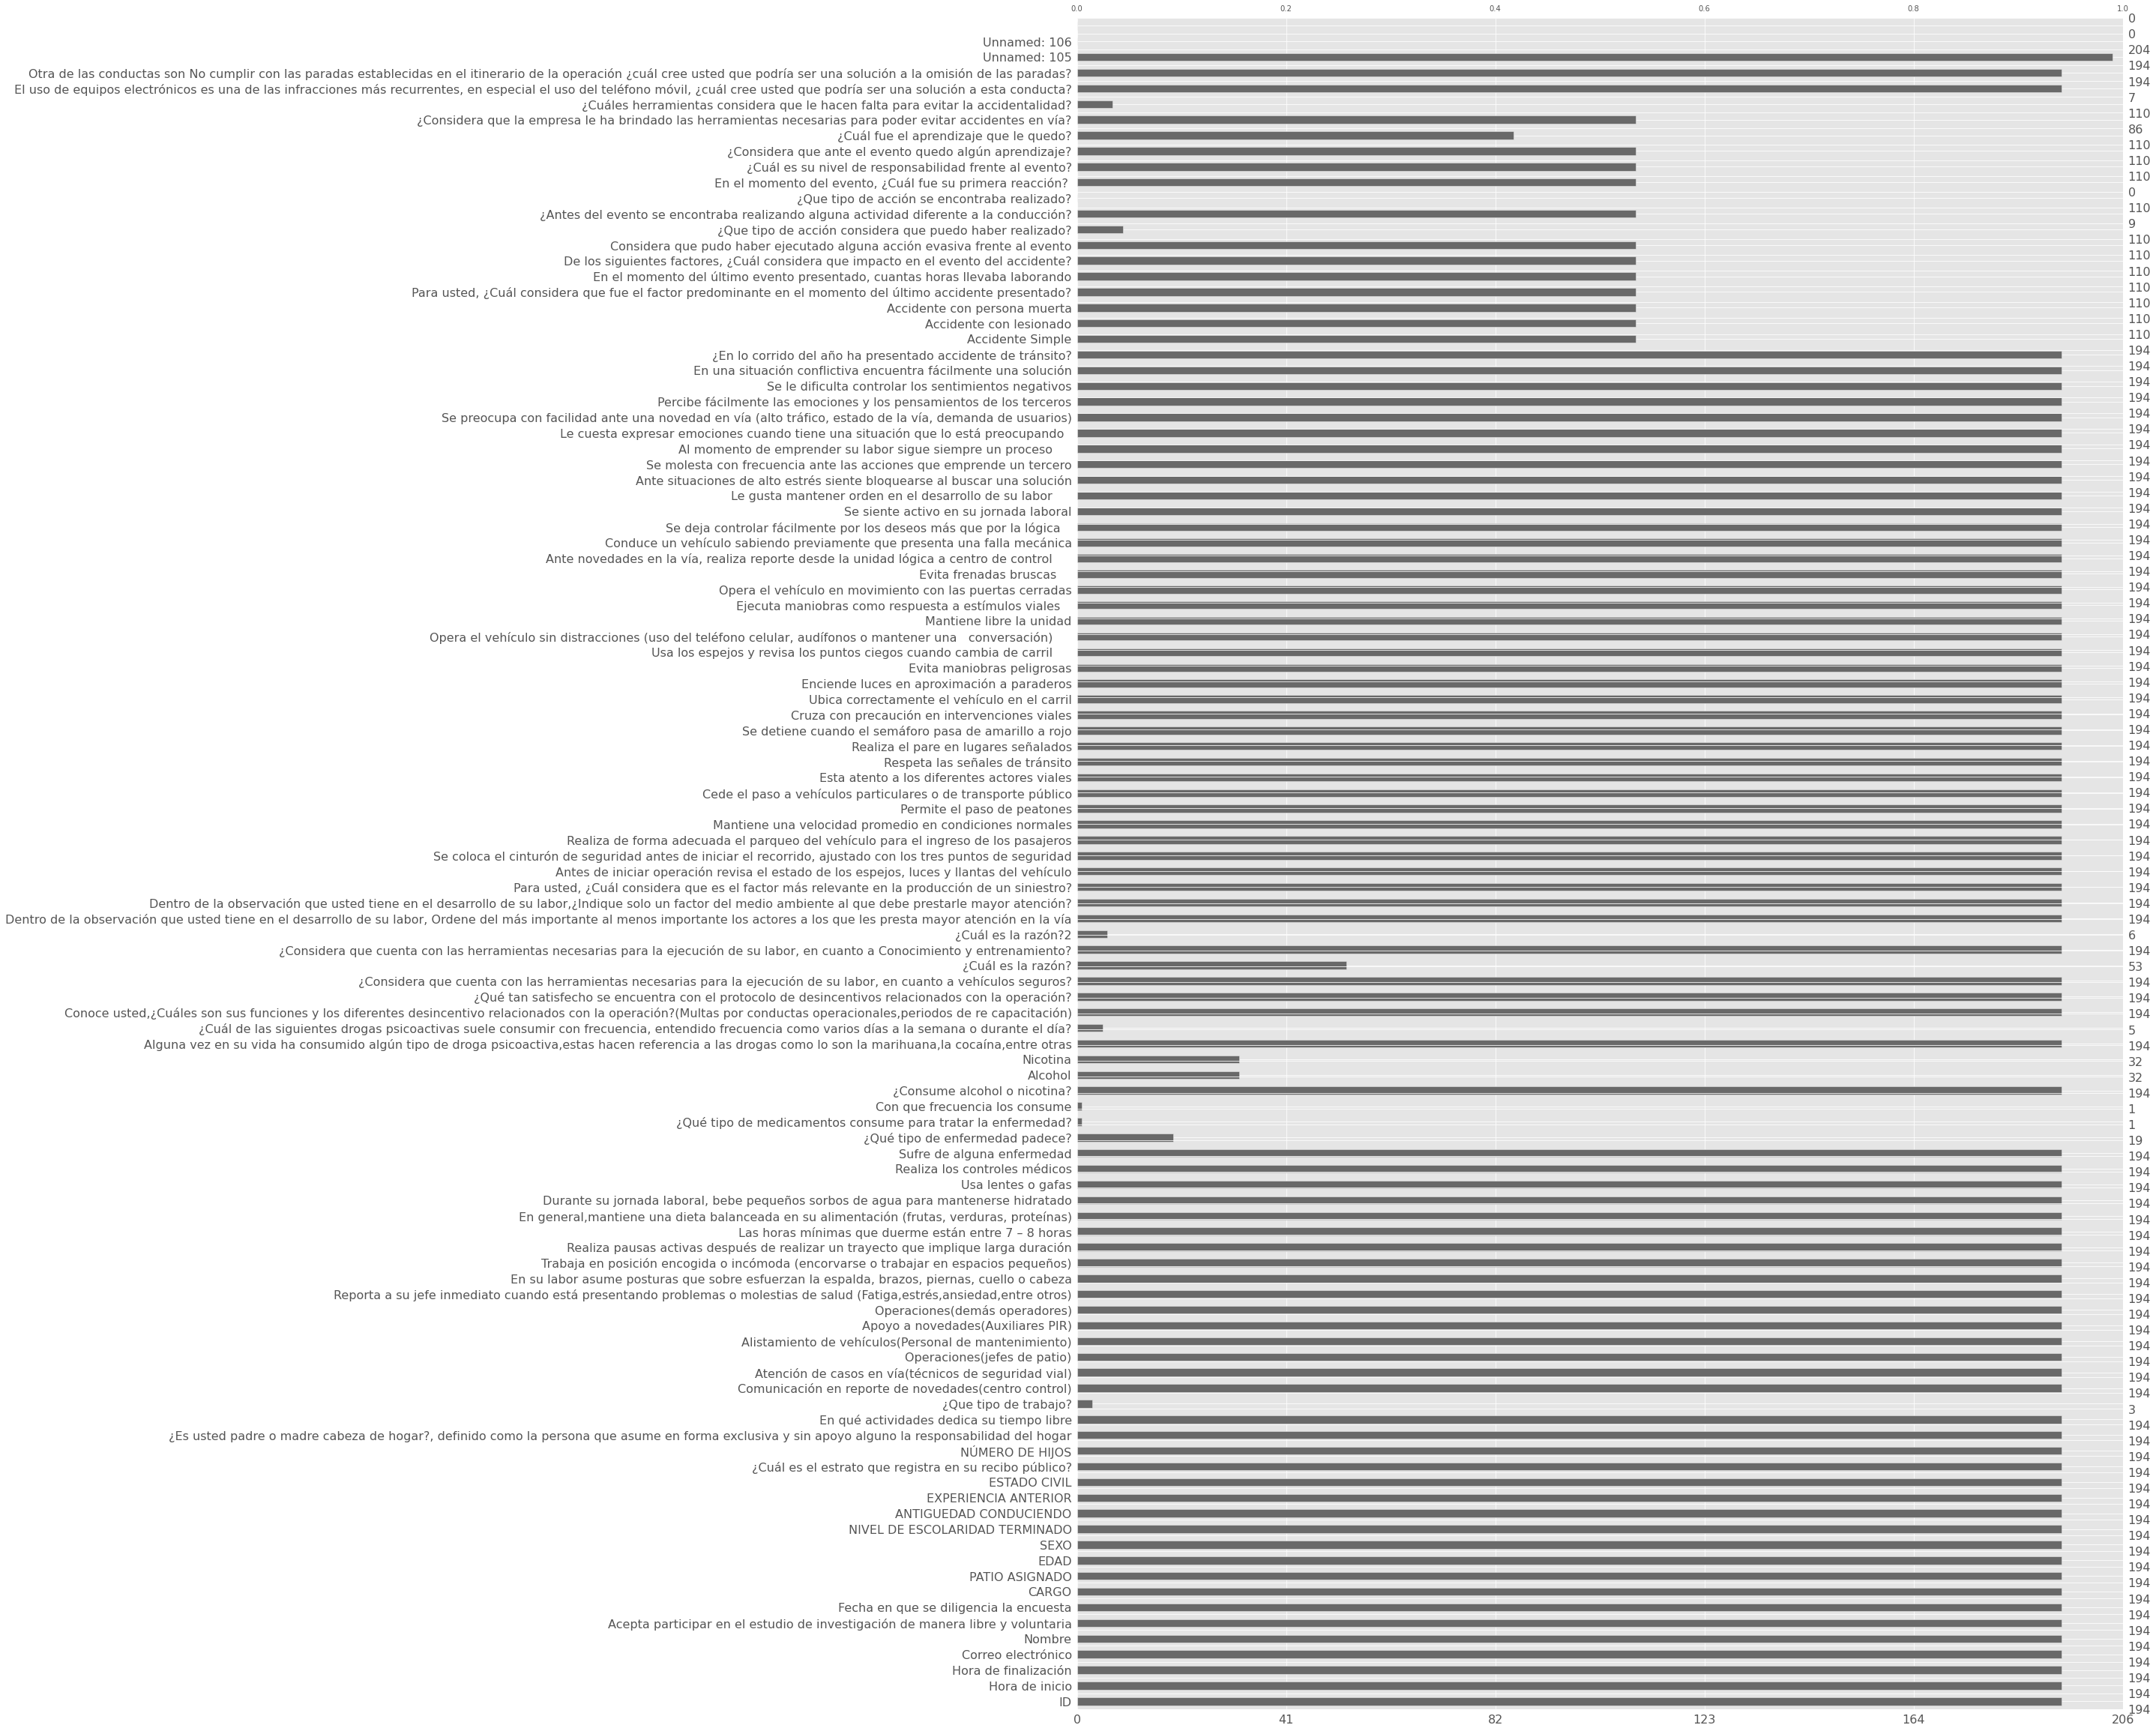

In [ ]:
msno.bar(df);

In [ ]:
!pip install xlrd --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 4.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Uninstalling xlrd-1.2.0:
      Successfully uninstalled xlrd-1.2.0


In [ ]:
df.head(5)

,ID,Hora de inicio,Hora de finalización,Correo electrónico,Nombre,Acepta participar en el estudio de investigación de manera libre y voluntaria,Fecha en que se diligencia la encuesta,CARGO,PATIO ASIGNADO,EDAD,...,¿Cuál es su nivel de responsabilidad frente al evento?,¿Considera que ante el evento quedo algún aprendizaje?,¿Cuál fue el aprendizaje que le quedo?,¿Considera que la empresa le ha brindado las herramientas necesarias para poder evitar accidentes en vía?,¿Cuáles herramientas considera que le hacen falta para evitar la accidentalidad?,"El uso de equipos electrónicos es una de las infracciones más recurrentes, en especial el uso del teléfono móvil, ¿cuál cree usted que podría ser una solución a esta conducta?",Otra de las conductas son No cumplir con las paradas establecidas en el itinerario de la operación ¿cuál cree usted que podría ser una solución a la omisión de las paradas?,Unnamed: 105,Unnamed: 106,
0,23.0,2022-08-22 09:28:46,2022-08-22 09:43:28,anonymous,anonymous,SI,2022-08-22,Operador Padrón,Tierra Buena,36 - 40 años,...,NaN,NaN,NaN,NaN,NaN,"Al iniciar operación activar el ""modo avión"" e...",Estar atento a recoger o dejar usuarios en par...,,NaN,NaN
1,24.0,2022-08-22 09:35:08,2022-08-22 09:45:40,anonymous,anonymous,SI,2022-08-22,Operador Padrón,Tierra Buena,46 - 50 años,...,NaN,NaN,NaN,NaN,NaN,"Al iniciar operación activar el ""modo avión"" e...",Estar atento a recoger o dejar usuarios en par...,,NaN,NaN
2,25.0,2022-08-22 09:31:18,2022-08-22 09:51:18,anonymous,anonymous,SI,2022-08-22,Operador Padrón,Tierra Buena,46 - 50 años,...,Responsabilidad Compartida,SI,Anteponerse a las maniobras de los terceros;,SI,NaN,"Al iniciar operación activar el ""modo avión"" e...",Estar atento a recoger o dejar usuarios en par...,,NaN,NaN
3,26.0,2022-08-22 09:43:30,2022-08-22 09:57:53,anonymous,anonymous,SI,2022-08-22,Operador Bus,Tierra Buena,36 - 40 años,...,No responsable,NO,NaN,NO,Los buses están en malas condiciones,"Ser consciente que es un elemento distractor, ...",Realizar campañas de información con los usuar...,,NaN,NaN
4,27.0,2022-08-22 09:49:17,2022-08-22 09:59:48,anonymous,anonymous,SI,2022-08-22,Operador Bus,Tierra Buena,41 - 45 años,...,Responsabilidad Compartida,SI,Tener mayor precaución con los diferentes acto...,SI,NaN,"Al iniciar operación activar el ""modo avión"" e...",Estar atento a recoger o dejar usuarios en par...,,NaN,NaN


##***Limpieza de datos***

In [ ]:
#### Filtro para seleccionar únicamente las Feature que aportan al análisis.####

#Columnas = ['PATIO ASIGNADO', 'CARGO', 'SEXO', 'EDAD', 'ESTADO CIVIL', 'NIVEL DE ESCOLARIDAD TERMINADO', 'NÚMERO DE HIJOS', 
            #'ANTIGÜEDAD CONDUCIENDO', 'EXPERIENCIA ANTERIOR', '¿Cuál es el estrato que registra en su recibo público?', '¿Es usted padre o madre cabeza de hogar?, definido como la persona que asume en forma exclusiva y sin apoyo alguno la responsabilidad del hogar',
            #'En qué actividades dedica su tiempo libre','Comunicación en   reporte de novedades (centro control)','Atención de casos en vía (técnicos de seguridad vial)','Operaciones (jefes de patio)']

#df_inf = df[Columnas]

In [ ]:
#### Filtro para renombrar la features.####

df_new = df.rename(columns={"ID":"id","Hora de inicio":"hora_in","Hora de finalización":"Hora_fin","Correo electrónico":"mail","Nombre":"nombre","Acepta participar en el estudio de investigación de manera libre y voluntaria":"acepta_encuesta",
                            "Fecha en que se diligencia la encuesta":"fecha","CARGO":"cargo","PATIO ASIGNADO":"patio","EDAD":"edad", "SEXO":"genero","NIVEL DE ESCOLARIDAD TERMINADO":"escolaridad_final","ANTIGUEDAD CONDUCIENDO":"tiempo_coduciendo",
                             "EXPERIENCIA ANTERIOR":"experiencia_ant","ESTADO CIVIL":"estado_civil","¿Cuál es el estrato que registra en su recibo público?":"estrato","NÚMERO DE HIJOS":"cant_hijos",
                           "¿Es usted padre o madre cabeza de hogar?, definido como la persona que asume en forma exclusiva y sin apoyo alguno la responsabilidad del hogar":"cabeza_de_Familia",
                            "En qué actividades dedica su tiempo libre":"tiempo_libre","¿Que tipo de trabajo?":"tipo_trabajo","Comunicación en reporte de novedades(centro control)":"comunicacion_c_control","Atención de casos en vía(técnicos de seguridad vial)":"Comun_tec_seg_vial",
                            "Operaciones(jefes de patio)":"comun_jefe_patio","Alistamiento de vehículos(Personal de mantenimiento)":"alistam_vehiculos","Apoyo a novedades(Auxiliares PIR)":"aux_PIR","Operaciones(demás operadores)":"operadores",
                            "Reporta a su jefe inmediato cuando está presentando problemas o molestias de salud (Fatiga,estrés,ansiedad,entre otros)":"reporte_jefe_salud","En su labor asume posturas que sobre esfuerzan la espalda, brazos, piernas, cuello o cabeza":"postura_ergonomica",
                            "Trabaja en posición encogida o incómoda (encorvarse o trabajar en espacios pequeños)":"postura_incomoda","Realiza pausas activas después de realizar un trayecto que implique larga duración":"pausa_act",
                            "Las horas mínimas que duerme están entre 7 – 8 horas":"hrs_min_7_8","En general,mantiene una dieta balanceada en su alimentación (frutas, verduras, proteínas)":"dieta","Durante su jornada laboral, bebe pequeños sorbos de agua para mantenerse hidratado":"Hidatracion",
                            "Usa lentes o gafas":"usa_len_gaf","Realiza los controles médicos":"control_med","Sufre de alguna enfermedad":"sufre_enf","¿Qué tipo de enfermedad padece?":"tipo_enf","¿Qué tipo de medicamentos consume para tratar la enfermedad?":"tip_med_cons",
                            "Con que frecuencia los consume":"frec_cons_med","¿Consume alcohol o nicotina?":"alcoh_nicot","Alcohol":"cons_alcohol","Nicotina":"cons_nicotina","Alguna vez en su vida ha consumido algún tipo de droga psicoactiva,estas hacen referencia a las drogas como lo son la marihuana,la cocaína,entre otras":"cons_psicoactiva",
                            "¿Cuál de las siguientes drogas psicoactivas suele consumir con frecuencia, entendido frecuencia como varios días a la semana o durante el día?":"frec_cons_psicoap",
                            "Conoce usted,¿Cuáles son sus funciones y los diferentes desincentivo relacionados con la operación?(Multas por conductas operacionales,periodos de re capacitación)":"func_desincentivo",
                            "¿Qué tan satisfecho se encuentra con el protocolo de desincentivos relacionados con la operación?":"nivel_satisf_desinc","¿Considera que cuenta con las herramientas necesarias para la ejecución de su labor, en cuanto a vehículos seguros?":"vehiculo_segu",
                            "¿Cuál es la razón?":"cual_es_causa","¿Considera que cuenta con las herramientas necesarias para la ejecución de su labor, en cuanto a Conocimiento y entrenamiento?":"Cuenta_con_capac","¿Cuál es la razón?2":"cual_razon",
                            "Dentro de la observación que usted tiene en el desarrollo de su labor, Ordene del más importante al menos importante los actores a los que les presta mayor atención en la vía":"fac_impo_lab_via",
                            "Dentro de la observación que usted tiene en el desarrollo de su labor,¿Indique solo un factor del medio ambiente al que debe prestarle mayor atención?":"fac_amb_atencion",
                            "Para usted, ¿Cuál considera que es el factor más relevante en la producción de un siniestro?":"fac_relev_siniestro","Antes de iniciar operación revisa el estado de los espejos, luces y llantas del vehículo":"revi_esta_vehic",
                            "Se coloca el cinturón de seguridad antes de iniciar el recorrido, ajustado con los tres puntos de seguridad":"usa_cin_segu","Realiza de forma adecuada el parqueo del vehículo para el ingreso de los pasajeros":"parq_adecu_veh",
                            "Mantiene una velocidad promedio en condiciones normales":"vel_prom_norm","Permite el paso de peatones":"per_pas_peat","Cede el paso a vehículos particulares o de transporte público":"per_paso_veh",
                            "Esta atento a los diferentes actores viales":"aten_act_viales","Respeta las señales de tránsito":"res_se_trans","Realiza el pare en lugares señalados":"pare_lug_autor","Se detiene cuando el semáforo pasa de amarillo a rojo":"stop_sem_r_a",
                            "Cruza con precaución en intervenciones viales":"cruza_pre_inter_via","Ubica correctamente el vehículo en el carril":"ubi_vehi_carril","Enciende luces en aproximación a paraderos":"enci_luce_parq",
                            })
                           
                        

In [ ]:
#### Filtro para cambiar de object a numerico la features.####

df_new.loc[df_new['genero']=='Masculino', 'genero']='M'
df_new.loc[df_new['genero']=='Femenino', 'genero']='F'
df_new.loc[df_new['cant_hijos']=='>4', 'cant_hijos']=5

df_new.loc[df_new['comunicacion_c_control']=='Excelente', 'comunicacion_c_control']=5
df_new.loc[df_new['comunicacion_c_control']=='Buena', 'comunicacion_c_control']=3
df_new.loc[df_new['comunicacion_c_control']=='Regular', 'comunicacion_c_control']=2
df_new.loc[df_new['comunicacion_c_control']=='Mala', 'comunicacion_c_control']=1

df_new.loc[df_new['Comun_tec_seg_vial']=='Excelente', 'Comun_tec_seg_vial']=5
df_new.loc[df_new['Comun_tec_seg_vial']=='Buena', 'Comun_tec_seg_vial']=3
df_new.loc[df_new['Comun_tec_seg_vial']=='Regular', 'Comun_tec_seg_vial']=2
df_new.loc[df_new['Comun_tec_seg_vial']=='Mala', 'Comun_tec_seg_vial']=1

df_new.loc[df_new['comun_jefe_patio']=='Excelente', 'comun_jefe_patio']=5
df_new.loc[df_new['comun_jefe_patio']=='Buena', 'comun_jefe_patio']=3
df_new.loc[df_new['comun_jefe_patio']=='Regular', 'comun_jefe_patio']=2
df_new.loc[df_new['comun_jefe_patio']=='Mala', 'comun_jefe_patio']=1

df_new.loc[df_new['alistam_vehiculos']=='Excelente', 'alistam_vehiculos']=5
df_new.loc[df_new['alistam_vehiculos']=='Buena', 'alistam_vehiculos']=3
df_new.loc[df_new['alistam_vehiculos']=='Regular', 'alistam_vehiculos']=2
df_new.loc[df_new['alistam_vehiculos']=='Mala', 'alistam_vehiculos']=1

df_new.loc[df_new['aux_PIR']=='Excelente', 'aux_PIR']=5
df_new.loc[df_new['aux_PIR']=='Buena', 'aux_PIR']=3
df_new.loc[df_new['aux_PIR']=='Regular', 'aux_PIR']=2
df_new.loc[df_new['aux_PIR']=='Mala', 'aux_PIR']=1

df_new.loc[df_new['operadores']=='Excelente', 'operadores']=5
df_new.loc[df_new['operadores']=='Buena', 'operadores']=3
df_new.loc[df_new['operadores']=='Regular', 'operadores']=2
df_new.loc[df_new['operadores']=='Mala', 'operadores']=1


df_new.loc[df_new['reporte_jefe_salud']=='Siempre', 'reporte_jefe_salud']=10
df_new.loc[df_new['reporte_jefe_salud']=='Casi siempre', 'reporte_jefe_salud']=7
df_new.loc[df_new['reporte_jefe_salud']=='Casi Nunca', 'reporte_jefe_salud']=4
df_new.loc[df_new['reporte_jefe_salud']=='Nunca', 'reporte_jefe_salud']=0

df_new.loc[df_new['postura_ergonomica']=='Siempre', 'postura_ergonomica']=10
df_new.loc[df_new['postura_ergonomica']=='Casi siempre', 'postura_ergonomica']=7
df_new.loc[df_new['postura_ergonomica']=='Casi Nunca', 'postura_ergonomica']=4
df_new.loc[df_new['postura_ergonomica']=='Nunca', 'postura_ergonomica']=0

df_new.loc[df_new['postura_incomoda']=='Siempre', 'postura_incomoda']=10
df_new.loc[df_new['postura_incomoda']=='Casi siempre', 'postura_incomoda']=7
df_new.loc[df_new['postura_incomoda']=='Casi Nunca', 'postura_incomoda']=4
df_new.loc[df_new['postura_incomoda']=='Nunca', 'postura_incomoda']=0



df_new.loc[df_new['tiempo_coduciendo']=='>  10 años', 'tiempo_coduciendo']= 10
df_new.loc[df_new['tiempo_coduciendo']=='7 - 10 años', 'tiempo_coduciendo']= 8
df_new.loc[df_new['tiempo_coduciendo']=='5 - 7 años', 'tiempo_coduciendo']= 6
df_new.loc[df_new['tiempo_coduciendo']=='3 - 5 años', 'tiempo_coduciendo']= 4
df_new.loc[df_new['tiempo_coduciendo']=='1 - 3 años', 'tiempo_coduciendo']= 2
df_new.loc[df_new['tiempo_coduciendo']=='0 - 1 año', 'tiempo_coduciendo']= 1




In [ ]:
df_new["postura_incomoda"].head(60)

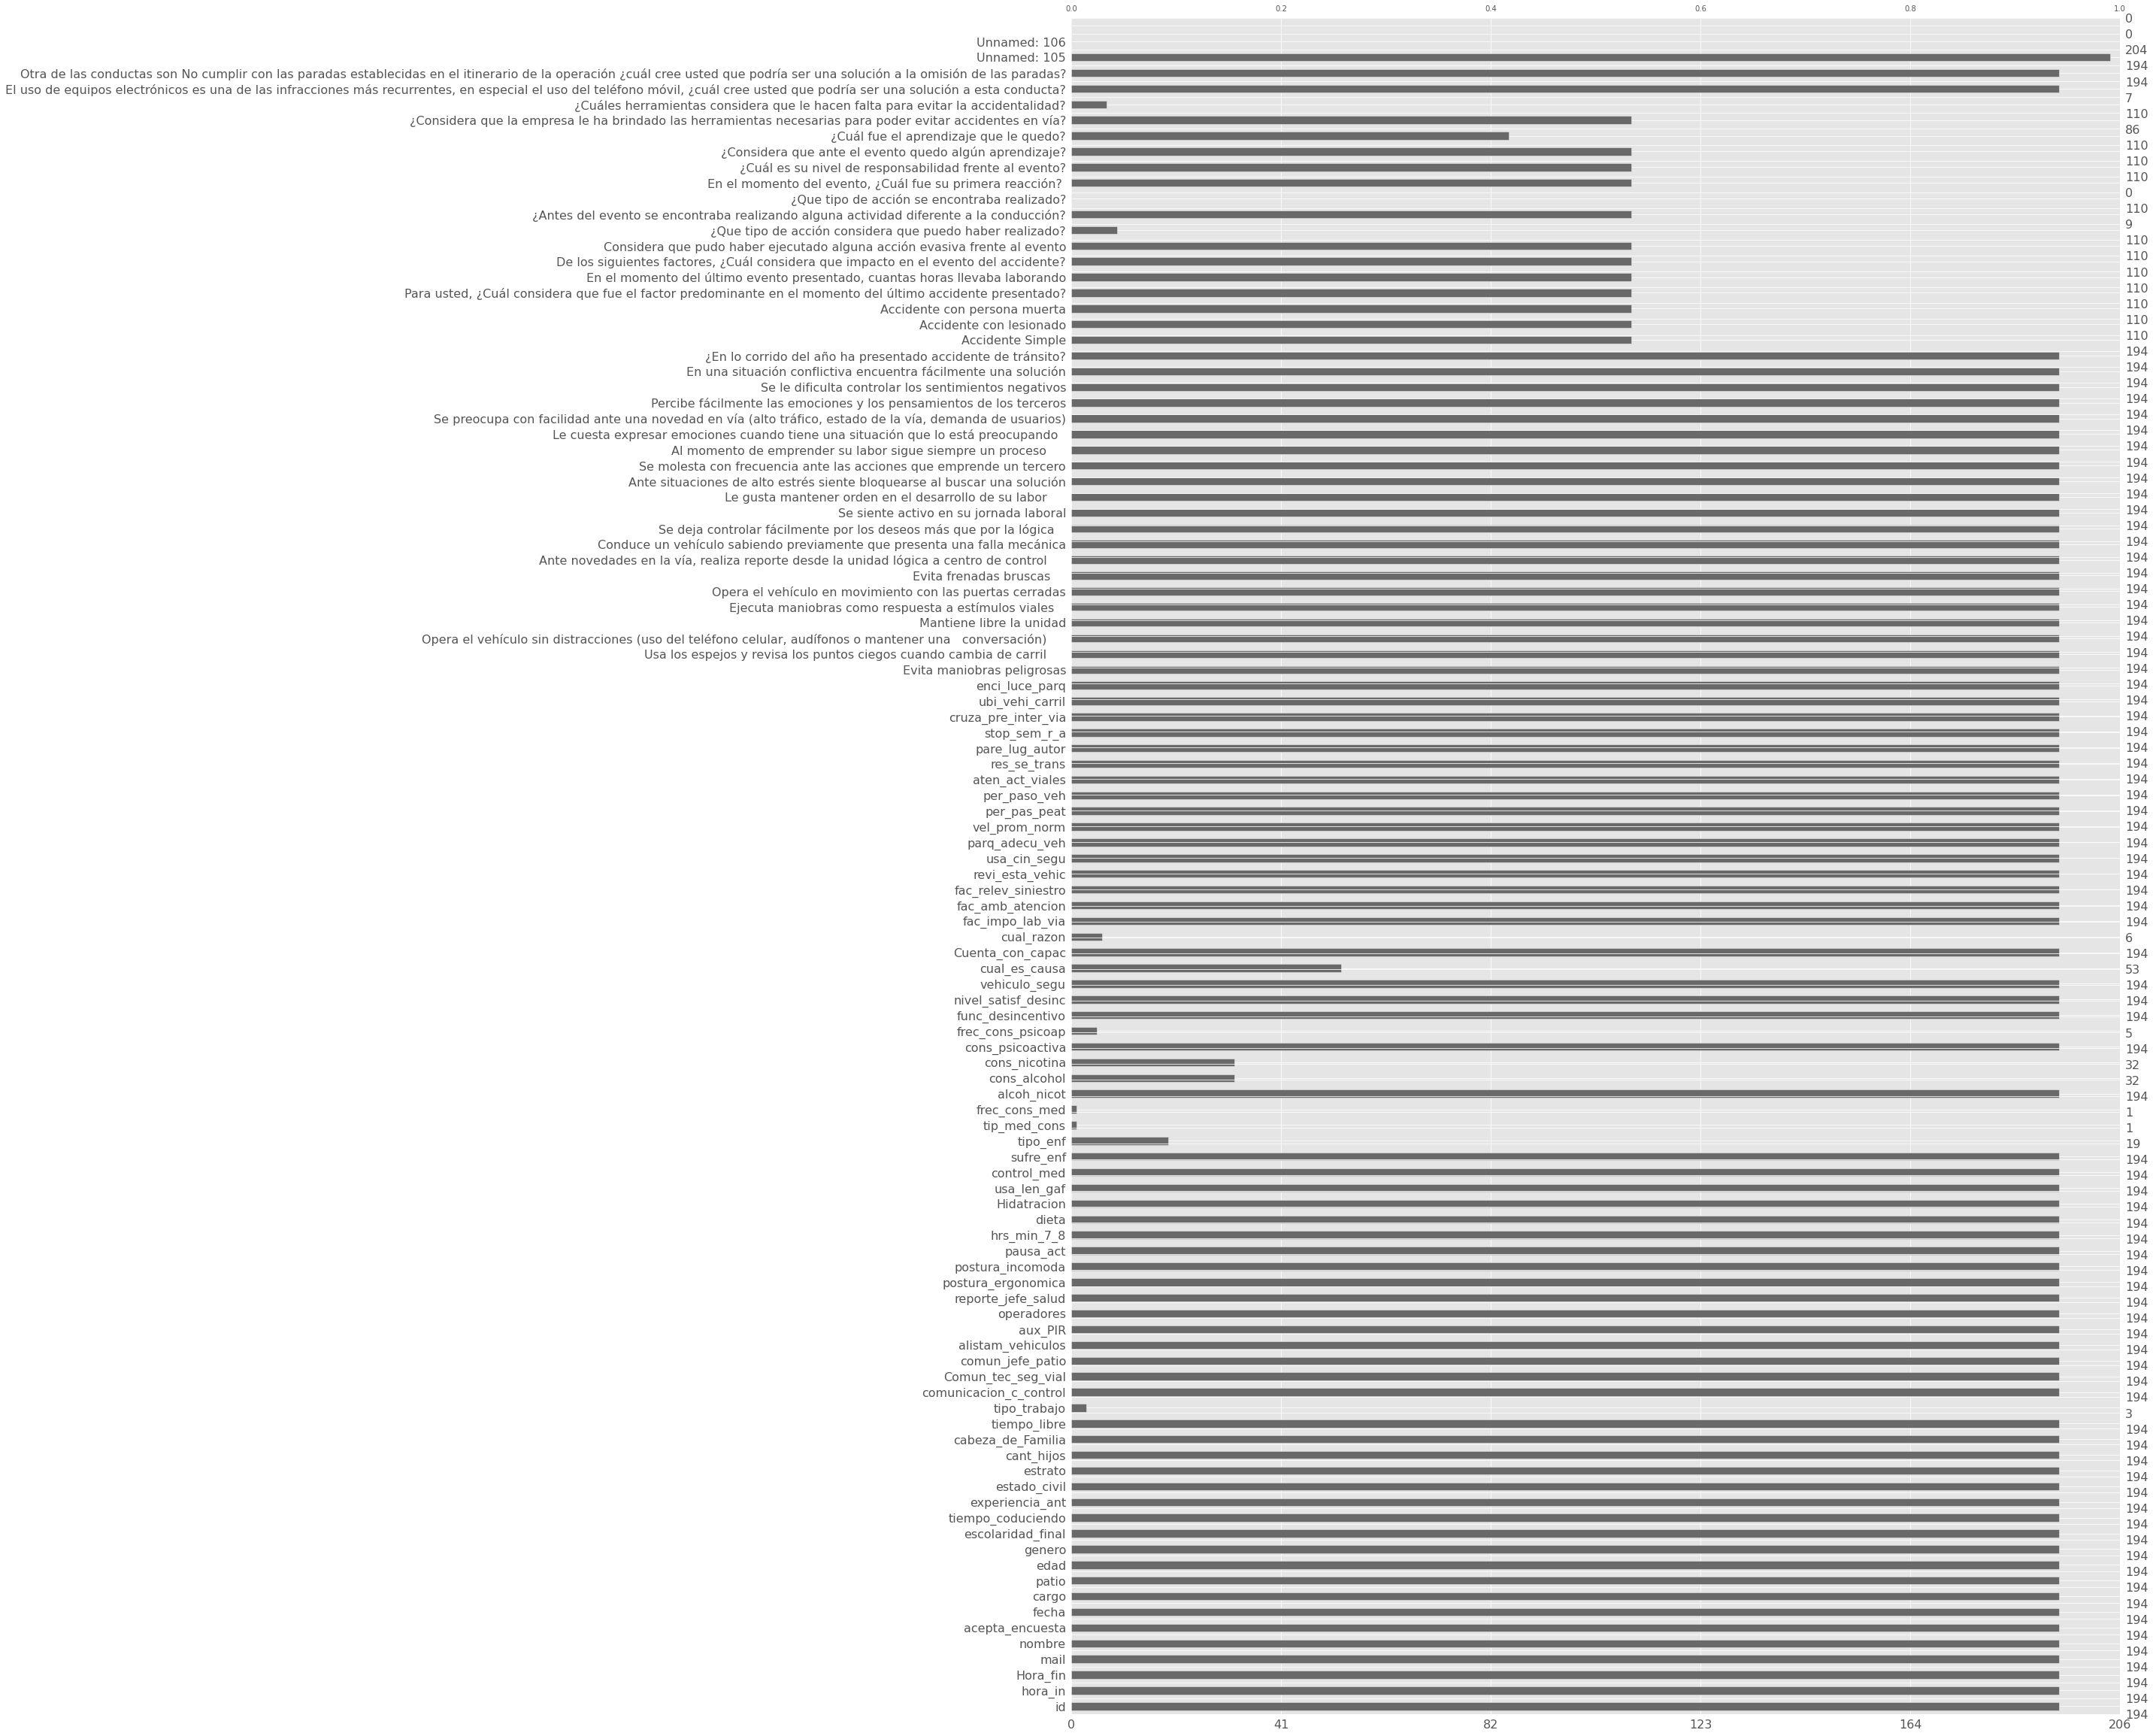

In [ ]:
msno.bar(df_new);

In [ ]:
df_new.describe()

,id,estrato,nivel_satisf_desinc,Accidente Simple,Accidente con lesionado,Accidente con persona muerta,¿Que tipo de acción se encontraba realizado?,Unnamed: 106,
count,194.000000,194.00000,194.000000,110.000000,110.000000,110.000000,0.0,0.0,0.0
mean,120.845361,2.14433,4.597938,0.927273,0.263636,0.009091,NaN,NaN,NaN
std,56.768659,0.54800,3.030620,0.463515,0.462884,0.095346,NaN,NaN,NaN
min,23.000000,1.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,72.250000,2.00000,2.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN
50%,120.500000,2.00000,5.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN
75%,169.750000,2.00000,7.000000,1.000000,0.750000,0.000000,NaN,NaN,NaN
max,218.000000,3.00000,10.000000,3.000000,2.000000,1.000000,NaN,NaN,NaN


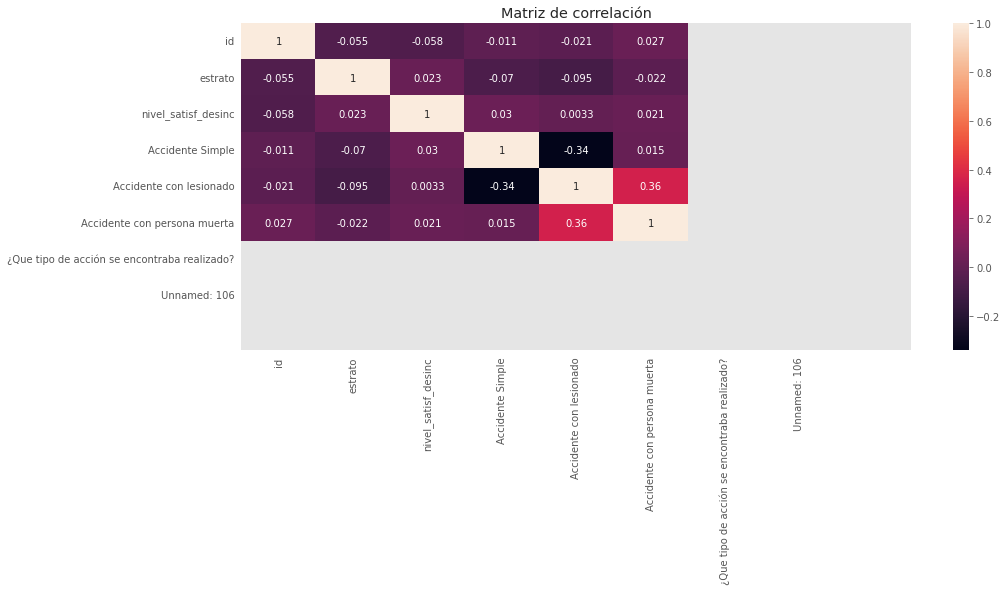

In [ ]:
plt.figure(figsize = (15,6)) 
sns.heatmap(df_new.corr(), annot=True)
plt.title("Matriz de correlación")
plt.show()

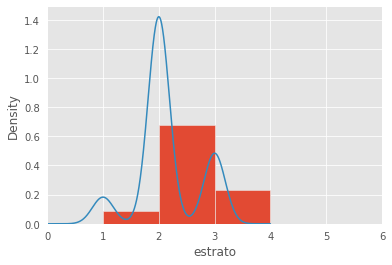

In [ ]:
ax = df_new['estrato'].plot.hist(density=True, xlim=[0,6], bins=range(0,6))
df_new['estrato'].plot.density(ax=ax)
ax.set_xlabel('estrato');

In [ ]:
frec_abs_edad = df_new["edad"].value_counts()
frec_abs_edad.rename("frec_abs_edad", inplace = True)
Frecuencia_relativa_edad = df_new["edad"].value_counts(normalize = True)
Frecuencia_relativa_edad.rename("Frecuencia_relativa_edad", inplace = True)
Frecuencia_relativa_porcentual_edad= df_new["edad"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_edad.rename("frec_rela_%", inplace = True)

tabla_frecuencia = pd.concat([frec_abs_edad,Frecuencia_relativa_edad,Frecuencia_relativa_porcentual_edad],axis=1)
total = pd.DataFrame(tabla_frecuencia.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia,total],axis = 0)


,frec_abs_edad,Frecuencia_relativa_edad,frec_rela_%
46 - 50 años,34.0,0.175258,17.525773
36 - 40 años,30.0,0.154639,15.463918
41 - 45 años,26.0,0.134021,13.402062
51 - 55 años,26.0,0.134021,13.402062
31 - 35 años,22.0,0.113402,11.340206
56 - 60 años,21.0,0.108247,10.824742
26 - 30 años,17.0,0.087629,8.762887
> 61 años,9.0,0.046392,4.639175
18 - 25 años,9.0,0.046392,4.639175
TOTALES,194.0,1.000000,100.000000


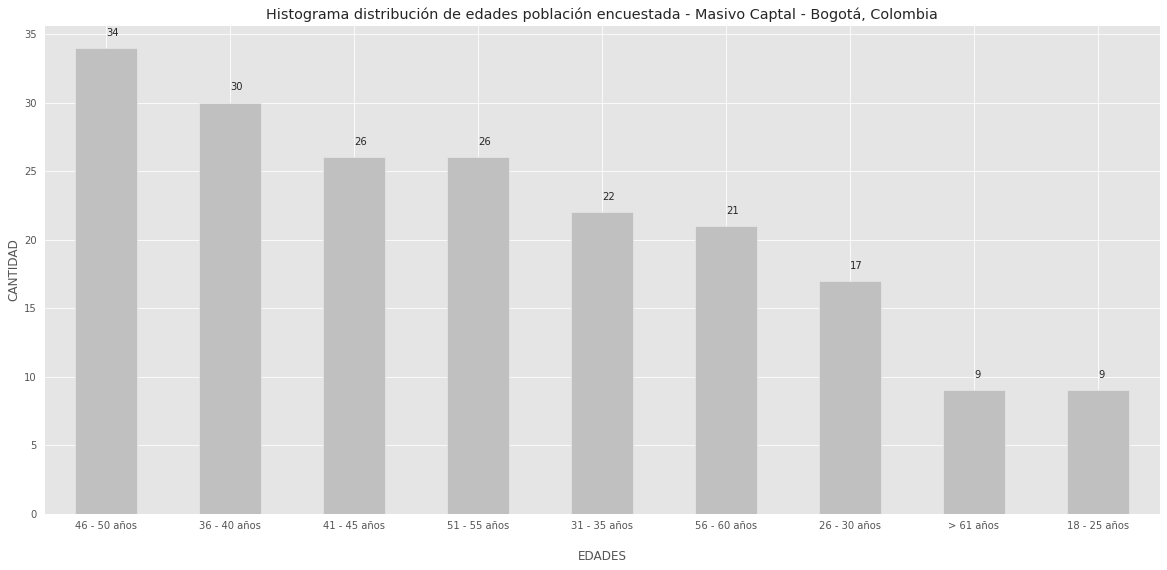

In [ ]:
plt.style.use("ggplot")   
plt.figure(figsize = (20,9))
plt.title("Histograma distribución de edades población encuestada - Masivo Captal - Bogotá, Colombia",) 
plt.xlabel("\nEDADES")     
plt.ylabel("CANTIDAD") 
tabla_frecuencia["frec_abs_edad"].plot(kind="bar",color = "silver")

#ax = plt.axes()        
#ax.yaxis.grid()
#ax.xaxis.grid()

for label, annot in enumerate(tabla_frecuencia['frec_abs_edad']):  
  plt.annotate(str(annot),xy=(label,annot + 0.9))
#ax.set_facecolor('w')
plt.xticks(rotation = 0)
plt.show()

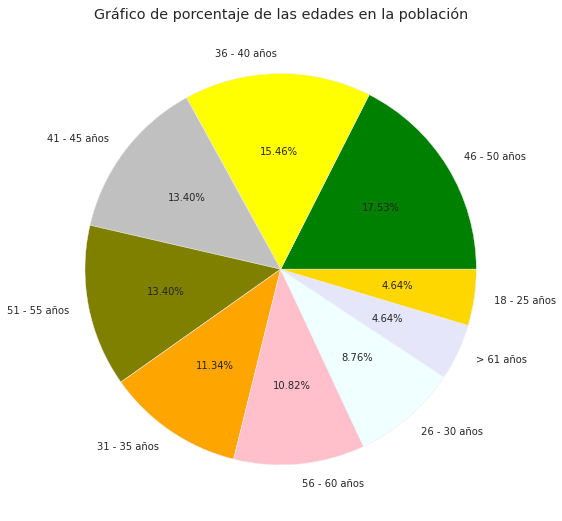

In [ ]:
## pie plot
plt.figure(figsize = (20,9))
plt.pie(tabla_frecuencia['frec_abs_edad'],labels = tabla_frecuencia.index,
        colors = ["Green", "Yellow", "Silver", "Olive", "orange", "pink", "Azure","Lavender","Gold",], autopct='%.2f%%')
plt.title("Gráfico de porcentaje de las edades en la población",)
plt.show()

# De la información anterior podemos dar a conocer:

1. El rango de edad que sobre sale en el estudio son edades dentro del rango (46 a 50 años), lo anterior representa un ***17.53%*** de la población encuestada.

2. El rango de edades con menor presencia es el (> a 61 años) y (18 a 25 años) con un ***4.64%***, esto puede estar relacionado con la poca participación de estos rangos o simplemente la compañía contrata pocos jovenes y colaboradores con edades mayores a los 61 años.

#¿Que género tuvo mayor presencia?

In [ ]:
df_new["genero"].value_counts()

M    190
F      4
Name: genero, dtype: int64

In [ ]:

frec_abs = df_new["genero"].value_counts()
frec_abs.rename("frec_abs", inplace = True)

M    190
F      4
Name: frec_abs, dtype: int64

In [ ]:
## Frecuencia relativa.
frec_rela = df_new["genero"].value_counts(normalize = True)
frec_rela.rename("frec_rela", inplace = True)

M    0.979381
F    0.020619
Name: frec_rela, dtype: float64

In [ ]:
## Frecuencia Porcentual.
frec_rela_porcen = df_new["genero"].value_counts(normalize = True)*100
frec_rela_porcen.rename("frec_rela_%", inplace = True)

M    97.938144
F     2.061856
Name: frec_rela_%, dtype: float64

In [ ]:
tabla_frecuencia = pd.concat([frec_abs,frec_rela,frec_rela_porcen],axis=1)
total = pd.DataFrame(tabla_frecuencia.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia,total],axis = 0)

,frec_abs,frec_rela,frec_rela_%
M,190.0,0.979381,97.938144
F,4.0,0.020619,2.061856
TOTALES,194.0,1.000000,100.000000


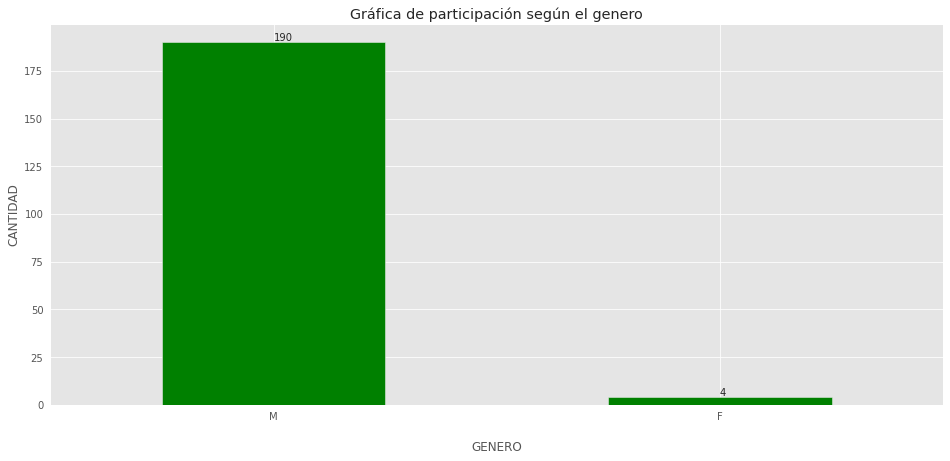

In [ ]:
plt.style.use("ggplot") 
plt.figure(figsize = (16,7))
plt.title("Gráfica de participación según el genero",)
plt.xlabel("\nGENERO") 
plt.ylabel("CANTIDAD") 
tabla_frecuencia["frec_abs"].plot(kind="bar",color = "green")

#ax = plt.axes()        
#ax.yaxis.grid()
#ax.xaxis.grid()

for label, annot in enumerate(tabla_frecuencia['frec_abs']):  
  plt.annotate(str(annot),xy=(label,annot + 0.9))
#ax.set_facecolor('w')
plt.xticks(rotation = 0)
plt.show()

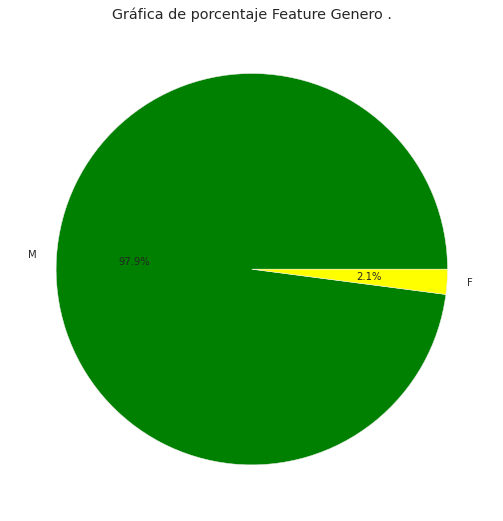

In [ ]:
## pie plot
plt.figure(figsize = (20,9))
plt.pie(tabla_frecuencia['frec_abs'],labels = tabla_frecuencia.index,
        colors = ["green", "yellow"], autopct='%.1f%%')
plt.title("Gráfica de porcentaje Feature Genero .",)
plt.show()

Hay 190 hombres y 4 mujeres en este conjunto de datos, para un total de 194 personas. el genero masculino aporto el ***97.9%*** y el femenino el ***2.1%***, es claro que el sesgo esta dado por género másculino, sin evidenciar exclusión.

In [ ]:
frec_abs_estrato = df_new["estrato"].value_counts()
frec_abs_estrato.rename("frec_abs_estrato", inplace = True)
Frecuencia_relativa_estrato = df_new["estrato"].value_counts(normalize = True)
Frecuencia_relativa_estrato.rename("Frecuencia_relativa_estrato", inplace = True)
Frecuencia_relativa_porcentual_estrato= df_new["estrato"].value_counts(normalize = True)*100
Frecuencia_relativa_porcentual_estrato.rename("frec_rela_%", inplace = True)

tabla_frecuencia_estrato = pd.concat([frec_abs_estrato,Frecuencia_relativa_estrato,Frecuencia_relativa_porcentual_estrato],axis=1)
total = pd.DataFrame(tabla_frecuencia_estrato.apply(sum,axis=0), columns=["TOTALES"]).T
pd.concat([tabla_frecuencia_estrato,total],axis = 0)

,frec_abs_estrato,Frecuencia_relativa_estrato,frec_rela_%
2.0,132.0,0.680412,68.041237
3.0,45.0,0.231959,23.195876
1.0,17.0,0.087629,8.762887
TOTALES,194.0,1.000000,100.000000


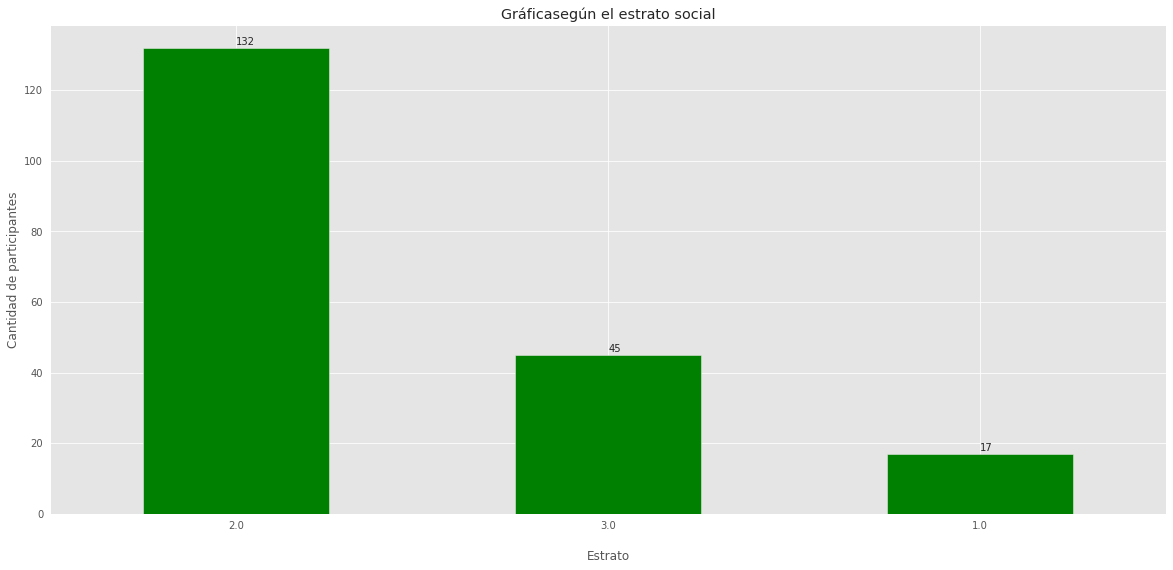

In [ ]:
## Distribución de los estratos

plt.style.use("ggplot")   
plt.figure(figsize = (20,9))
plt.title("Gráficasegún el estrato social",)
plt.xlabel("\nEstrato")      
plt.ylabel("Cantidad de participantes")           
tabla_frecuencia_estrato["frec_abs_estrato"].plot(kind="bar",color = "green")

#ax = plt.axes()        
#ax.yaxis.grid()
#ax.xaxis.grid()

for label, annot in enumerate(tabla_frecuencia_estrato['frec_abs_estrato']):  
  plt.annotate(str(annot),xy=(label,annot + 0.9))
#ax.set_facecolor('w')
plt.xticks(rotation = 0)
plt.show()

In [ ]:
fig = px.scatter(df_new, x = "patio", y = "edad", hover_name = "estrato",
                 color = "estrato", hover_data = {"estrato":True})
fig.show()